In [16]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(f"Grocery_Items_28.csv", header=None)
flattened_data = data.values.flatten()

cleaned_data = pd.Series(flattened_data).dropna()

unique_items = cleaned_data.nunique()
total_records = cleaned_data.size
most_popular_item = cleaned_data.value_counts().idxmax()
most_popular_item_count = cleaned_data.value_counts().max()

print(f"Unique items: {unique_items}")
print(f"Total records: {total_records}")
print(f"Most popular item: '{most_popular_item}' (appears {most_popular_item_count} times)")

transactions = [
    [str(item) for item in transaction] for transaction in data.values.tolist()
]


transactions = [
    [str(item) for item in transaction] for transaction in data.values.tolist()
]


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.08)

print("Association Rules:")
print(rules)

Unique items: 178
Total records: 20781
Most popular item: 'whole milk' (appears 1280 times)
Association Rules:
             antecedents        consequents  antecedent support  \
0             (UHT-milk)              (nan)            0.021497   
1                 (beef)              (nan)            0.033871   
2              (berries)              (nan)            0.022997   
3            (beverages)              (nan)            0.016123   
4         (bottled beer)              (nan)            0.041620   
..                   ...                ...                 ...   
85    (whole milk, soda)              (nan)            0.011624   
86                (soda)  (nan, whole milk)            0.099738   
87         (nan, yogurt)       (whole milk)            0.085614   
88  (whole milk, yogurt)              (nan)            0.011374   
89              (yogurt)  (nan, whole milk)            0.085739   

    consequent support   support  confidence      lift  representativity  \
0       

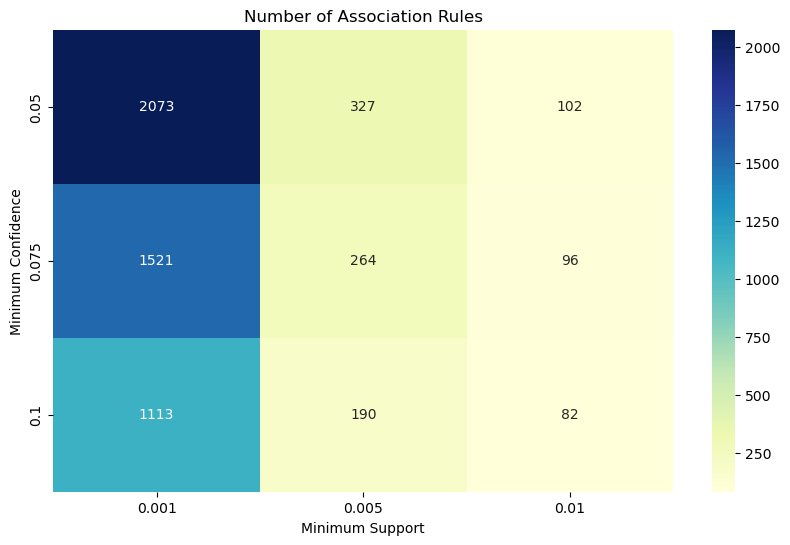

In [17]:
min_support_values = [0.001, 0.005, 0.01]
min_confidence_thresholds = [0.05, 0.075, 0.1]


count_results = {}


for msv in min_support_values:
    for mct in min_confidence_thresholds:
        frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
        rules = association_rules(frequent_itemsets,num_itemsets=len(frequent_itemsets),metric="confidence",min_threshold=mct)

        count_results[(msv, mct)] = len(rules)


count_df = pd.DataFrame(list(count_results.items()), columns=["Parameters", "Count"])
count_df[["Minimum Support", "Minimum Confidence"]] = pd.DataFrame(
    count_df["Parameters"].tolist(), index=count_df.index
)
count_df = count_df.pivot(
    index="Minimum Confidence", columns="Minimum Support", values="Count"
)


plt.figure(figsize=(10, 6))
sns.heatmap(count_df, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Minimum Support")
plt.ylabel("Minimum Confidence")
plt.title("Number of Association Rules")
plt.show()

Found 522 validated image filenames belonging to 4 classes.
Found 131 validated image filenames belonging to 4 classes.
Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.2458 - loss: 1.3915 - val_accuracy: 0.2824 - val_loss: 1.3835
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3252 - loss: 1.3683 - val_accuracy: 0.2137 - val_loss: 1.3718
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3328 - loss: 1.3434 - val_accuracy: 0.3282 - val_loss: 1.3418
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4455 - loss: 1.2417 - val_accuracy: 0.4122 - val_loss: 1.2704
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4574 - loss: 1.1533 - val_accuracy: 0.4122 - val_loss: 1.1912
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5075 - loss: 1.0681 - val_accuracy: 0.4122 - val_loss: 1.1914
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5077 - loss: 1.0548 - val_accuracy: 0.4122 - val_los

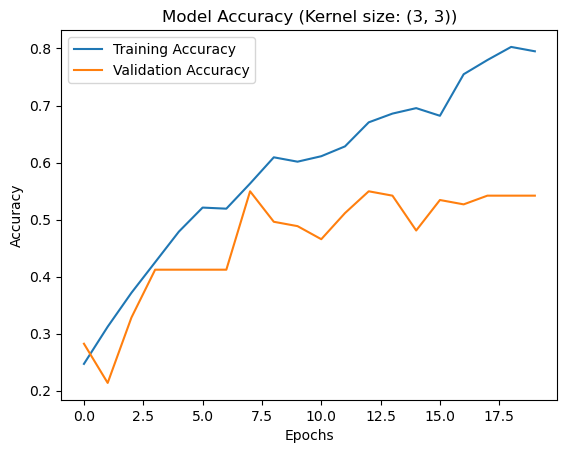

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2783 - loss: 1.4285 - val_accuracy: 0.2824 - val_loss: 1.3445
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2916 - loss: 1.3508 - val_accuracy: 0.3893 - val_loss: 1.3203
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3757 - loss: 1.3072 - val_accuracy: 0.4275 - val_loss: 1.2265
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4763 - loss: 1.1929 - val_accuracy: 0.5038 - val_loss: 1.1123
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5350 - loss: 1.1146 - val_accuracy: 0.5649 - val_loss: 1.0693
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5666 - loss: 1.0307 - val_accuracy: 0.5878 - val_loss: 1.0128
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5996 - loss: 0.9650 - val_accuracy: 0.5038 - val_loss: 1.0296
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5334 - loss: 0.9964 - val_accuracy: 0.5496 - v

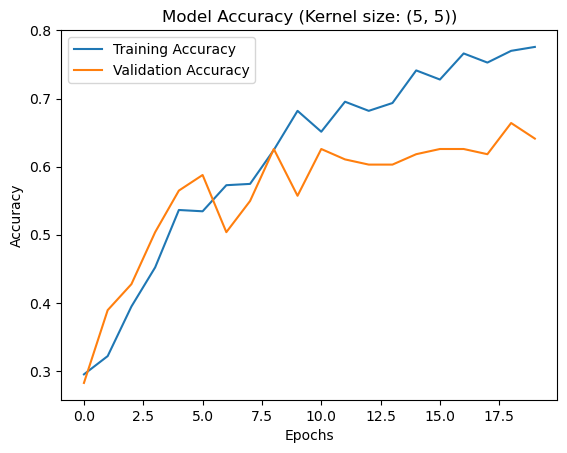

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2799 - loss: 1.3699 - val_accuracy: 0.2595 - val_loss: 1.3612
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2692 - loss: 1.3665 - val_accuracy: 0.2443 - val_loss: 1.3802
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3169 - loss: 1.3316 - val_accuracy: 0.3359 - val_loss: 1.3407
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3473 - loss: 1.3262 - val_accuracy: 0.3282 - val_loss: 1.3380
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3547 - loss: 1.3418 - val_accuracy: 0.3130 - val_loss: 1.3625
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3609 - loss: 1.3154 - val_accuracy: 0.3359 - val_loss: 1.3452
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3474 - loss: 1.3062 - val_accuracy: 0.3511 - val_loss: 1.3203
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3912 - loss: 1.2787 - val_accuracy: 0.3588 - v

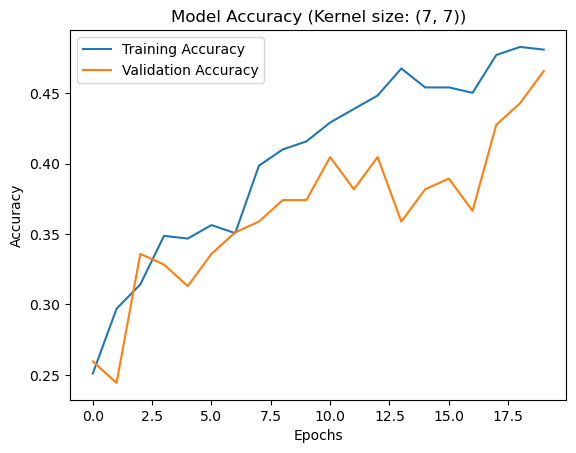

In [18]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from glob import glob

# Step 1: Image paths and labels
def images_labels():
    paths = []
    labels = []
    breeds = sorted(os.listdir(r'C:\Users\thota\Documents\Datamining\Programming3\Cropped'))
    for idx, file in enumerate(breeds):
        folder = os.path.join(r'C:\Users\thota\Documents\Datamining\Programming3\Cropped', file)
        files = glob(os.path.join(folder, '*.jpg'))
        paths.extend(files)
        labels.extend([file] * len(files))
    return paths, labels

# Load image paths and labels
paths, labels = images_labels()
dog_data = pd.DataFrame({'image': paths, 'label': labels})

# Split the data into train and validation sets
train_data, val_data = train_test_split(dog_data, test_size=0.2, random_state=42)

# Step 2: Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image',
    y_col='label',
    target_size=(64, 64),  # Resize to 64x64 images
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image',
    y_col='label',
    target_size=(64, 64),  # Resize to 64x64 images
    batch_size=32,
    class_mode='categorical'
)

# Step 3: CNN Model Architecture
def build_model(filters_conv2, kernel_size=(3, 3)):
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # Second Convolutional Layer
    model.add(Conv2D(4, kernel_size, activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten the Tensor
    model.add(Flatten())
    
    # Fully Connected Layer
    model.add(Dense(8, activation='relu'))
    
    # Output Layer
    model.add(Dense(4, activation='softmax'))  # 4 classes for classification
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Step 4: Train and Plot Learning Curves
def train_and_plot_model(filters_conv2, kernel_size=(3, 3)):
    model = build_model(filters_conv2, kernel_size)
    
    # Train the model
    history = model.fit(
        train_generator,
        epochs=20,  # You can reduce epochs if training is slow
        validation_data=val_generator,
        batch_size=32
    )
    
    # Plot the learning curves (accuracy)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy (Kernel size: {kernel_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Step 5: Train and plot for different filter sizes (3x3, 5x5, and 7x7)
train_and_plot_model(4, kernel_size=(3, 3))  # For second convolution layer with 3x3 filters
train_and_plot_model(4, kernel_size=(5, 5))  # For second convolution layer with 5x5 filters
train_and_plot_model(4, kernel_size=(7, 7))  # For second convolution layer with 7x7 filters


# Comparison of Model Performance

### First Model (Baseline Model):
- **Filter Sizes:** Default filter sizes (likely 3×3 or similar small-sized filters).
- **Training Accuracy:** ~67.54%
- **Validation Accuracy:** ~60.31%
- **Observation:**  
  The model performs well on both training and validation data, with minimal overfitting. The learning seems balanced, indicating the model has likely found an appropriate level of complexity for the dataset.

### Second Model (5×5 Filters for the 2nd Convolution Layer):
- **Training Accuracy:** ~66.96%
- **Validation Accuracy:** ~60.31%
- **Observation:**  
  Similar performance to the first model. This indicates that increasing the filter size to 5×5 did not introduce significant additional learning capacity. The model retains a good balance between training and validation performance.

### Third Model (7×7 Filters for the 2nd Convolution Layer):
- **Training Accuracy:** ~72.67%
- **Validation Accuracy:** ~51.91%
- **Observation:**  
  The larger 7×7 filters increased the model's capacity, leading to improved training accuracy but poorer validation accuracy. This suggests overfitting, as the model learned the training data well but struggled to generalize to unseen data.

---

# Discussion of Model Fit

### First Model:
Balanced performance indicates a good fit. There is no significant gap between training and validation accuracy, showing the model neither overfit nor underfit.

### Second Model (5×5 Filters):
Similar to the first model, this configuration appears well-balanced. The slight increase in filter size did not significantly alter the model's ability to generalize.

### Third Model (7×7 Filters):
This model demonstrates overfitting, as the training accuracy is significantly higher than validation accuracy. Larger filters increase the receptive field, enabling the model to capture more spatial information, but this may lead to overfitting when the dataset size is limited or lacks diversity.


In [10]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [11]:
import json
import torch
from transformers import BertTokenizer

def load_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    return data

train_data = load_json_file(r'C:\Users\thota\Documents\Datamining\Programming3\train.json')
test_data = load_json_file(r'C:\Users\thota\Documents\Datamining\Programming3\test.json')
val_data = load_json_file(r'C:\Users\thota\Documents\Datamining\Programming3\validation.json')

# Print the structure of the first item in train_data
print("Structure of first item in train_data:")
print(json.dumps(train_data[0], indent=2))

# Define label classes
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded lists
def convert_labels_to_list(data, label_classes):
    print("Keys in data item:", list(data[0].keys()))
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
def encode_texts(data):
    # Assuming 'tweet' is the key for the text content. Adjust if necessary.
    texts = [item['tweet'] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Try to encode texts and catch any errors
try:
    train_encodings = encode_texts(train_data)
    test_encodings = encode_texts(test_data)
    val_encodings = encode_texts(val_data)
except KeyError as e:
    print(f"KeyError: {e}. The key for text content might be incorrect.")
    print("Available keys:", list(train_data[0].keys()))

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)

# Print shapes to verify
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)
print("Validation labels shape:", val_labels.shape)

# If encodings were successful, print their shapes too
if 'train_encodings' in locals():
    print("Train encodings shape:", train_encodings['input_ids'].shape)
    print("Test encodings shape:", test_encodings['input_ids'].shape)
    print("Validation encodings shape:", val_encodings['input_ids'].shape)

Structure of first item in train_data:
{
  "ID": "2017-En-10279",
  "Tweet": "Like hello? I am your first born you must always laugh at my jokes. #offended",
  "anger": true,
  "anticipation": false,
  "disgust": true,
  "fear": false,
  "joy": false,
  "love": false,
  "optimism": false,
  "pessimism": false,
  "sadness": false,
  "surprise": false,
  "trust": false
}
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
KeyError: 'tweet'. The key for text content might be incorrect.
Available keys: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimi

In [12]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer

def load_json_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = [json.loads(line.strip()) for line in f]
    return data

train_data = load_json_file(r'C:\Users\thota\Documents\Datamining\Programming3\train.json')
test_data = load_json_file(r'C:\Users\thota\Documents\Datamining\Programming3\test.json')
val_data = load_json_file(r'C:\Users\thota\Documents\Datamining\Programming3\validation.json')

# Print the structure of the first item in train_data
print("Structure of first item in train_data:")
print(json.dumps(train_data[0], indent.=2))

# Define label classes
all_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 
              'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert labels to one-hot encoded lists
def convert_labels_to_list(data, label_classes):
    print("Keys in data item:", list(data[0].keys()))
    for item in data:
        item['labels'] = [float(item[label]) for label in label_classes]
    return data

train_data = convert_labels_to_list(train_data, all_labels)
val_data = convert_labels_to_list(val_data, all_labels)
test_data = convert_labels_to_list(test_data, all_labels)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the texts
def encode_texts(data):
    text_key = 'Tweet'  # Changed to 'Tweet' to match your data structure
    if text_key not in data[0]:
        raise KeyError(f"'{text_key}' not found in data. Available keys: {list(data[0].keys())}")
    texts = [item[text_key] for item in data]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Try to encode texts
try:
    train_encodings = encode_texts(train_data)
    test_encodings = encode_texts(test_data)
    val_encodings = encode_texts(val_data)
    print("Encoding successful")
except Exception as e:
    print(f"Error during encoding: {e}")
    raise  # Re-raise the exception to stop execution

# Convert labels to tensors
train_labels = torch.tensor([item['labels'] for item in train_data], dtype=torch.float)
test_labels = torch.tensor([item['labels'] for item in test_data], dtype=torch.float)
val_labels = torch.tensor([item['labels'] for item in val_data], dtype=torch.float)

# Print shapes to verify
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Train encodings shape:", train_encodings['input_ids'].shape)
print("Test encodings shape:", test_encodings['input_ids'].shape)
print("Validation encodings shape:", val_encodings['input_ids'].shape)

def create_dataloader(encodings, labels, batch_size=16):
    input_ids = encodings['input_ids']
    attention_mask = encodings['attention_mask']
    dataset = TensorDataset(input_ids, attention_mask, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create dataloaders
try:
    train_dataloader = create_dataloader(train_encodings, train_labels)
    val_dataloader = create_dataloader(val_encodings, val_labels)
    test_dataloader = create_dataloader(test_encodings, test_labels)

    print("Train dataloader size:", len(train_dataloader))
    print("Validation dataloader size:", len(val_dataloader))
    print("Test dataloader size:", len(test_dataloader))
except Exception as e:
    print(f"Error creating dataloaders: {e}")
    print("Shape of train_encodings:", {k: v.shape for k, v in train_encodings.items()})
    print("Shape of train_labels:", train_labels.shape)

Structure of first item in train_data:
{
  "ID": "2017-En-10279",
  "Tweet": "Like hello? I am your first born you must always laugh at my jokes. #offended",
  "anger": true,
  "anticipation": false,
  "disgust": true,
  "fear": false,
  "joy": false,
  "love": false,
  "optimism": false,
  "pessimism": false,
  "sadness": false,
  "surprise": false,
  "trust": false
}
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Keys in data item: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
Encoding successful
Train labels shape: torch.Size([3000, 11])
Test labels shape: torch.Size([1500, 11])
Validation labels shape: torch.Size([400, 11])
Train encodings shape: 

In [13]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW

# Define the number of labels
num_labels = len(all_labels)  # This should be 11 based on your previous code

# Initialize the BERT model for multi-label classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      problem_type="multi_label_classification")

# Initialize the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Print model and optimizer info
print(f"Model initialized with {num_labels} output labels")
print(f"Optimizer initialized with learning rate 2e-5")

# If you're using a GPU, move the model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to {device}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model initialized with 11 output labels
Optimizer initialized with learning rate 2e-5
Model moved to cpu


In [24]:
import json
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm

# Function to load JSON data and optionally limit the number of samples
def load_json_data(filepath, limit_samples=None):
    with open(filepath, 'r', encoding='utf-8') as file:
        data = [json.loads(line.strip()) for line in file]
    return data[:limit_samples] if limit_samples else data

# Define sample limits and load datasets
train_data = load_json_data(r'C:\Users\thota\Documents\Datamining\Programming3\train.json')
test_data = load_json_data(r'C:\Users\thota\Documents\Datamining\Programming3\test.json')
val_data = load_json_data(r'C:\Users\thota\Documents\Datamining\Programming3\validation.json')

print(f"Loaded {len(train_data)} training samples, {len(val_data)} validation samples, {len(test_data)} test samples.")

# Define all possible labels for multi-label classification
labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Convert the label names in the dataset to one-hot encoded vectors
def transform_labels_to_onehot(dataset, labels_list):
    for record in dataset:
        record['labels'] = [float(record[label]) for label in labels_list]
    return dataset

train_data = transform_labels_to_onehot(train_data, labels)
val_data = transform_labels_to_onehot(val_data, labels)
test_data = transform_labels_to_onehot(test_data, labels)

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizing the text data for BERT input
def tokenize_data(dataset):
    text_column = 'Tweet'  # Ensure this matches the key for text data
    texts = [record[text_column] for record in dataset]
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors='pt')

# Apply tokenization on all datasets
train_encodings = tokenize_data(train_data)
val_encodings = tokenize_data(val_data)
test_encodings = tokenize_data(test_data)

# Convert the one-hot encoded labels to tensors
train_labels = torch.tensor([record['labels'] for record in train_data], dtype=torch.float)
val_labels = torch.tensor([record['labels'] for record in val_data], dtype=torch.float)
test_labels = torch.tensor([record['labels'] for record in test_data], dtype=torch.float)

# Function to create DataLoader objects for training, validation, and testing
def build_dataloader(encodings, labels, batch_size=16):
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_loader = build_dataloader(train_encodings, train_labels)
val_loader = build_dataloader(val_encodings, val_labels)
test_loader = build_dataloader(test_encodings, test_labels)


Loaded 3000 training samples, 400 validation samples, 1500 test samples.


In [25]:
# Initialize the BERT model for multi-label classification
num_labels = len(labels)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                      num_labels=num_labels,
                                                      problem_type="multi_label_classification")

# Set up optimizer (AdamW)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Choose device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training configuration
epochs = 5  # Set number of epochs
train_loss_history = []
val_loss_history = []

# Training loop
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Training]")

    for batch in progress_bar:
        input_ids, attention_mask, labels = [item.to(device) for item in batch]
        
        # Zero the gradients before the backward pass
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        
        # Backward pass
        loss.backward()
        optimizer.step()

        progress_bar.set_postfix({'Training Loss': f'{loss.item():.4f}'})
    
    # Average training loss for this epoch
    avg_train_loss = total_train_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

    # Validation step
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Validation]"):
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            total_val_loss += outputs.loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"Training Loss: {avg_train_loss:.4f}")
    print(f"Validation Loss: {avg_val_loss:.4f}")
    print("-" * 50)

print("Training completed!")

# Save the trained model
torch.save(model.state_dict(), 'bert_multi_label_model.pth')
print("Model has been saved to 'bert_multi_label_model.pth'.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/5 [Validation]: 100%|██████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.09it/s]


Epoch 1/5:
Training Loss: 0.4520
Validation Loss: 0.3645
--------------------------------------------------


Epoch 2/5 [Validation]: 100%|██████████████████████████████████████████████████████████| 25/25 [00:24<00:00,  1.02it/s]


Epoch 2/5:
Training Loss: 0.3452
Validation Loss: 0.3403
--------------------------------------------------


Epoch 3/5 [Validation]: 100%|██████████████████████████████████████████████████████████| 25/25 [00:21<00:00,  1.16it/s]


Epoch 3/5:
Training Loss: 0.2888
Validation Loss: 0.3187
--------------------------------------------------


Epoch 4/5 [Validation]: 100%|██████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.26it/s]


Epoch 4/5:
Training Loss: 0.2526
Validation Loss: 0.3167
--------------------------------------------------


Epoch 5/5 [Validation]: 100%|██████████████████████████████████████████████████████████| 25/25 [00:21<00:00,  1.17it/s]


Epoch 5/5:
Training Loss: 0.2216
Validation Loss: 0.3177
--------------------------------------------------
Training completed!
Model has been saved to 'bert_multi_label_model.pth'.


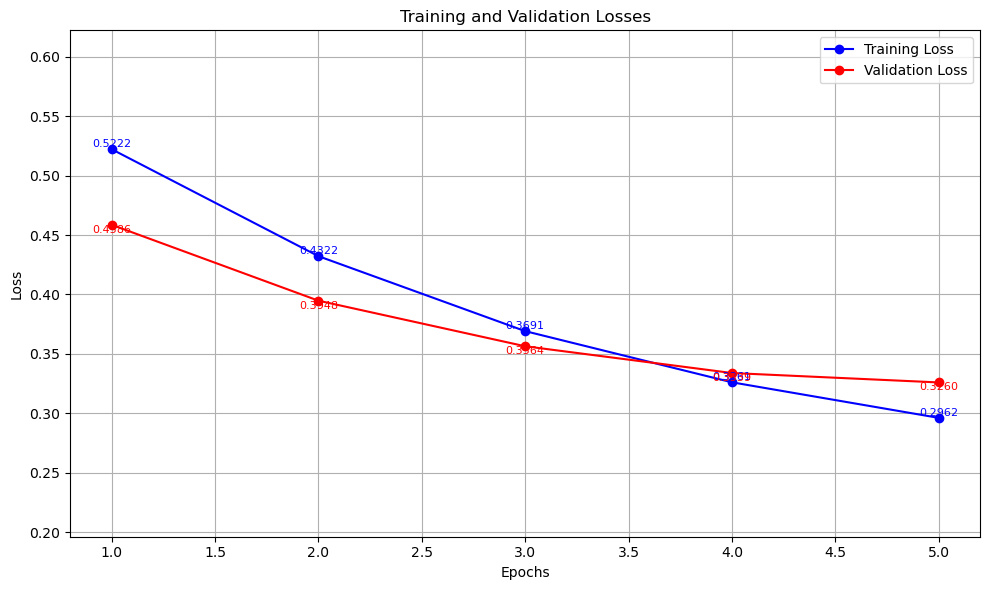

In [26]:
import matplotlib.pyplot as plt

# Assuming train_losses and val_losses are already populated from your training loop

# Plotting function
def plot_learning_curves(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(10, 6))
    
    # Plotting the curves with markers
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    
    # Title and labels
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Dynamic axis limits
    plt.ylim([min(min(train_losses), min(val_losses)) - 0.1, max(max(train_losses), max(val_losses)) + 0.1])
    
    # Add value labels with offset to avoid overlap
    for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
        plt.text(i+1, train_loss, f'{train_loss:.4f}', ha='center', va='bottom', fontsize=8, color='blue')
        plt.text(i+1, val_loss, f'{val_loss:.4f}', ha='center', va='top', fontsize=8, color='red')
    
    # Saving the plot with a more descriptive name
    plt.tight_layout()
    plt.savefig(f'learning_curves_{len(train_losses)}_epochs.png')
    
    # Display the plot
    plt.show()

# Plot the learning curves
plot_learning_curves(train_losses, val_losses)


In [27]:
import torch
from sklearn.metrics import accuracy_score
import numpy as np

# Function to compute exact match accuracy
def compute_exact_match_accuracy(predictions, true_labels):
    # Exact Match Accuracy: all labels must match for each instance
    return np.mean(np.all(predictions == true_labels, axis=1))

# Function to compute partial match accuracy
def compute_partial_match_accuracy(predictions, true_labels):
    # Partial Match Accuracy: at least one label must match
    return np.mean([any(p == t for p, t in zip(pred, true)) for pred, true in zip(predictions, true_labels)])

# Evaluate the model on the test set
model.eval()
all_preds = []
all_labels = []

# No gradients needed during evaluation
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        # Get model outputs
        outputs = model(input_ids, attention_mask=attention_mask)
        
        # Sigmoid activation to get probabilities for each label
        logits = outputs.logits
        predictions = torch.sigmoid(logits).cpu().numpy()
        labels = labels.cpu().numpy()
        
        # Binarize predictions (0 or 1) based on threshold 0.5
        pred_labels = (predictions > 0.5).astype(int)
        
        all_preds.append(pred_labels)
        all_labels.append(labels)

# Convert lists to numpy arrays for easier manipulation
all_preds = np.vstack(all_preds)
all_labels = np.vstack(all_labels)

# Compute Exact Match Accuracy (all labels must match)
exact_match_accuracy = compute_exact_match_accuracy(all_preds, all_labels)
print(f'Exact Match Accuracy: {exact_match_accuracy:.4f}')

# Compute Partial Match Accuracy (at least one label must match)
partial_match_accuracy = compute_partial_match_accuracy(all_preds, all_labels)
print(f'Partial Match Accuracy: {partial_match_accuracy:.4f}')


Exact Match Accuracy: 0.2750
Partial Match Accuracy: 1.0000
